In [1]:
### 도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 불러와서 train, test 각각 저장
train = pd.read_csv('data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')

In [5]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [6]:
test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
# 머신러닝 학습 데이터 train 
# 머신러닝 학습을 잘 했는지 테스트  test

In [9]:
train['Survived'] # 최종적으로 분류해야될 값, 0,1

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [8]:
print(train.shape) # 모델을 학습시켜주기 위해 문제와답을 넣어 학습
print(test.shape) # Survived 가 빠짐

(891, 11)
(418, 10)


- train,test info 확인해보기  
데이터 크기  
데이터 컬럼의 이름  
컬럼 널이 존재하는지 확인  
컬럼 안에 든 데이터 타입 확인

In [10]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

### 컬럼별 사망/생존 데이터 시각화

In [20]:
survived_1 = train[train['Survived'] == 1]['Sex'].value_counts()
survived_1 
#train.loc[train['Survived'] == 1,'Sex']

female    233
male      109
Name: Sex, dtype: int64

In [19]:
survived_0 = train[train['Survived'] == 0]['Sex'].value_counts()
survived_0

male      468
female     81
Name: Sex, dtype: int64

In [21]:
df= pd.DataFrame([survived_1,survived_0], index = ['survived','dead'])
df

female  male
survived     233   109
dead          81   468

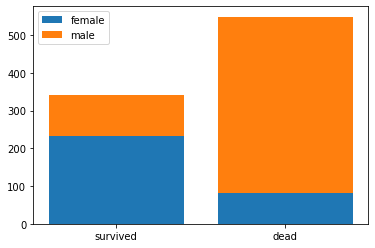

In [25]:
plt.bar(df.index, df['female'], label = 'female')
plt.bar(df.index, df['male'], label = 'male', bottom = df['female'])
plt.legend()
plt.show()

<AxesSubplot:>

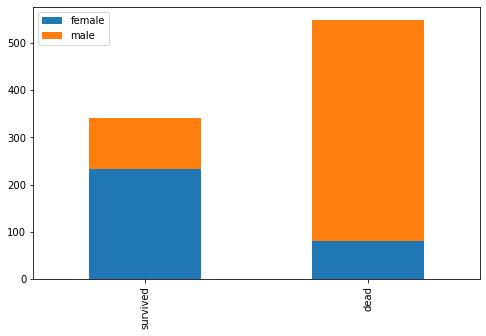

In [28]:
df.plot(kind = 'bar', stacked = True, figsize = (8,5))

- Pclass 에 따른 생존/사망 인원수 확인

In [34]:
p_s1 = train.loc[train['Survived']==1,'Pclass'].value_counts()

In [35]:
p_s0 = train.loc[train['Survived']==0,'Pclass'].value_counts()

In [37]:
p_s1.head(3)

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [38]:
p_s0.head(3)

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [40]:
df2 = pd.DataFrame([p_s1,p_s0], index = ['suvived','dead'])

Text(0.5, 1.0, 'pclass')

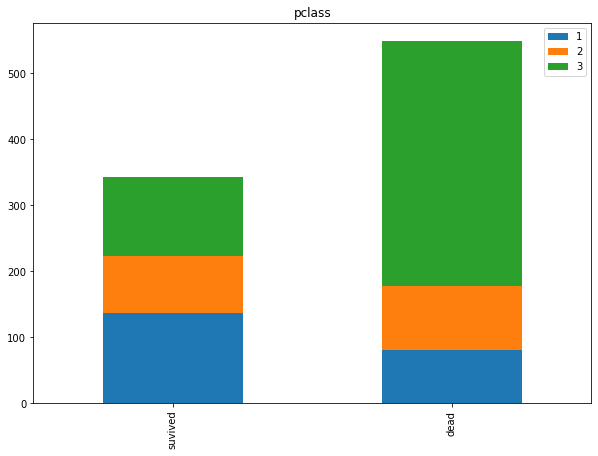

In [41]:
df2.plot(kind = 'bar', stacked = True, figsize = (10,7))
plt.title('pclass')

### 데이터 예측을 위한 전처리
1. 결측치(null) 채우기
2. 숫자로 데이터 맵핑

In [42]:
# train['Sex']
# male -> 0
# female -> 1

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

AttributeError: 'Rectangle' object has no property 'top'

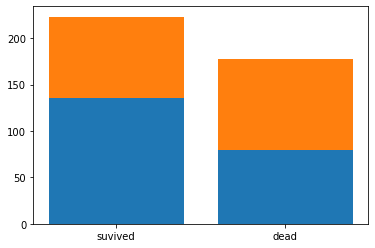

In [45]:
plt.bar(df2.index,df2[1], label=1)
plt.bar(df2.index,df2[2], label=2,bottom=df2[1])
plt.bar(df2.index,df2[3], label=3,top=df2[2])
plt.legend()
plt.show()